In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load your DataFrame
df=pd.read_csv('train.csv', skipinitialspace=True)



In [2]:
df

,name,duration_ms,explicit,popularity,artists,album_name,danceability,energy,key,loudness,...,liveness,valence,tempo,features_duration_ms,time_signature,n_beats,n_bars,popularity_confidence,processing,genre
0,Long Road,241760,False,46,Funki Porcini,Hed Phone Sex,0.690,0.513,5,-12.529,...,0.2810,0.6350,142.221,241760,4.0,567.0,141.0,NaN,1.279305,j-dance
1,"Daniâl My Son, Where Did You Vanish?",444000,False,0,Siavash Amini,A Trail of Laughters,0.069,0.196,1,-24.801,...,0.3600,0.0336,75.596,444000,4.0,617.0,155.0,NaN,2.367412,iranian
2,Ondskapens Galakse,333506,False,3,Kvelertak,Nattesferd,0.363,0.854,2,-7.445,...,0.2620,0.4890,116.628,333507,4.0,652.0,162.0,NaN,3.700483,black-metal
3,Can't Look Away,269800,False,23,The Wood Brothers,One Drop of Truth,0.523,0.585,5,-5.607,...,0.1170,0.3850,140.880,269800,4.0,619.0,155.0,0.469,1.279305,bluegrass
4,Thunderground,307651,False,25,The Darkraver;DJ Vince,Happy Hardcore Top 100,0.643,0.687,7,-11.340,...,0.2990,0.6370,143.956,307652,4.0,733.0,183.0,NaN,4.067086,happy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,Outpt,432026,False,0,Autechre,EP7,0.554,0.657,1,-14.232,...,0.1320,0.0335,117.319,432027,NaN,837.0,212.0,NaN,2.367412,idm
14996,Natural Environment Sounds: To Improve Sleep a...,182746,False,44,Natural White Noise Relaxation,Baby Sleep White Noise: Ultimate Album to Help...,0.103,0.860,1,-19.627,...,0.1230,0.0016,92.323,182747,3.0,277.0,92.0,NaN,2.367412,sleep
14997,Psychological Attack,400091,False,43,Droplex,Psychological Attack,0.799,0.535,1,-9.103,...,0.0713,0.0708,126.000,400091,4.0,837.0,209.0,NaN,2.367412,techno
14998,Don't Hate The 808 (feat. Lafa Taylor),197250,False,37,Bassnectar;Lafa Taylor,Noise vs Beauty,0.511,0.970,5,-2.299,...,0.4020,0.2700,160.044,197250,4.0,513.0,130.0,NaN,1.279305,breakbeat


In [3]:

df['duration_ms'] = df['duration_ms'].apply(lambda x: x/1000)
df['key'] = df['key'].astype(float)
df=df.round(2)

# Split data into training and test sets
train_data = df[~df['mode'].isnull()]
test_data = df[df['mode'].isnull()]

# Feature selection and engineering
X_train = train_data[['duration_ms', 'danceability', 'energy', 'key', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'n_beats', 'n_bars', 'processing']]  # Choose relevant features
y_train = train_data['mode']

X_test = test_data[['duration_ms', 'danceability', 'energy', 'key', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'n_beats', 'n_bars', 'processing']]  # Choose the same features for prediction

# Model selection and training
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

# Predict null values
predicted_values = regression_model.predict(X_test)

# Replace null values with predicted values
df.loc[df['mode'].isnull(), 'mode'] = predicted_values

# Model evaluation
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

regression_model.fit(X_train, y_train)
y_val_pred = regression_model.predict(X_val)

mse = mean_squared_error(y_val, y_val_pred)
rmse = mse ** 0.5
r2 = r2_score(y_val, y_val_pred)

print(f"Mean Squared Error on Validation Data: {mse}")
print(f"Root Mean Squared Error on Validation Data: {rmse}")
print(f"R-squared on Validation Data: {r2}")


Mean Squared Error on Validation Data: 0.21004923917127755
Root Mean Squared Error on Validation Data: 0.45831129068710225
R-squared on Validation Data: 0.09807482312810756


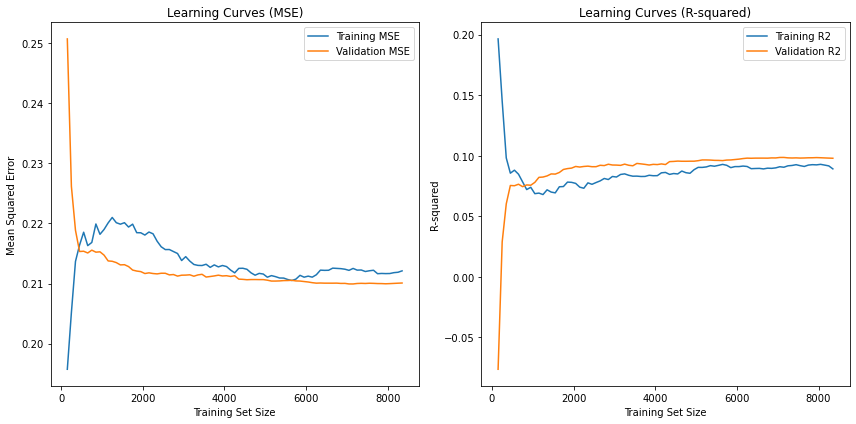

0.09793154983521568
0.21008260607014811


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score


# Load your DataFrame
df = pd.read_csv('train.csv')

df=df.round(2)

# Split data into training and test sets
train_data = df[~df['mode'].isnull()]
test_data = df[df['mode'].isnull()]

# Feature selection and engineering
X = train_data[['duration_ms', 'danceability', 'energy', 'key', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'n_beats', 'n_bars', 'processing']]  # Choose relevant features
y = train_data['mode']

X_test = test_data[['duration_ms', 'danceability', 'energy', 'key', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'n_beats', 'n_bars', 'processing']]  # Choose the same features for prediction

# Initialize Ridge regression model with a default alpha
regression_model = Ridge(alpha=0.0000000000000000000000000000000000000010)  # Initial alpha value (like a learning rate)

train_sizes, train_mse, val_mse, train_r2, val_r2 = [], [], [], [], []

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Create subsets of your data with increasing sizes
for train_size in range(150, len(X_train), 100):  # You can adjust the step size
    X_subset, y_subset = X_train[:train_size], y_train[:train_size]
    
    regression_model.fit(X_subset, y_subset)
    
    # Make predictions on the validation set
    y_val_pred = regression_model.predict(X_val)
    
    # Calculate validation MSE and R-squared
    val_mse_value = mean_squared_error(y_val, y_val_pred)
    val_r2_value = r2_score(y_val, y_val_pred)
    
    train_sizes.append(train_size)
    train_mse.append(mean_squared_error(y_subset, regression_model.predict(X_subset)))
    val_mse.append(val_mse_value)
    train_r2.append(r2_score(y_subset, regression_model.predict(X_subset)))
    val_r2.append(val_r2_value)

# Plot learning curves for MSE and R-squared
plt.figure(figsize=(12, 6))

# Plot MSE
plt.subplot(1, 2, 1)
plt.plot(train_sizes, train_mse, label='Training MSE')
plt.plot(train_sizes, val_mse, label='Validation MSE')
plt.xlabel('Training Set Size')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.title('Learning Curves (MSE)')

# Plot R-squared
plt.subplot(1, 2, 2)
plt.plot(train_sizes, train_r2, label='Training R2')
plt.plot(train_sizes, val_r2, label='Validation R2')
plt.xlabel('Training Set Size')
plt.ylabel('R-squared')
plt.legend()
plt.title('Learning Curves (R-squared)')

plt.tight_layout()
plt.show()

print(val_r2_value)
print(val_mse_value)


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix



# Load your DataFrame
df = pd.read_csv('train.csv')

df['duration_ms'] = df['duration_ms'].apply(lambda x: x/1000)
df['key'] = df['key'].astype(float)
df=df.round(2)

# Split the data into two subsets: one with non-null values and one with null values
train_data = df[~df['mode'].isnull()]  # Rows with non-null values
test_data = df[df['mode'].isnull()]  # Rows with null values

# Feature selection and engineering (select relevant features)
X_train = train_data[['duration_ms', 'loudness', 'tempo', 'n_beats', 'n_bars', 'processing']]  # Choose relevant features
y_train = train_data['mode']  # Target variable with non-null values

X_test = test_data[['duration_ms', 'loudness', 'tempo', 'n_beats', 'n_bars', 'processing']]  # Choose the same features for prediction

# Initialize and train a logistic regression model
logistic_model = LogisticRegression(C=0.000005, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0000001, verbose=0,
                   warm_start=False)
logistic_model.fit(X_train, y_train)

# Predict null values
predicted_values = logistic_model.predict(X_test)

# Replace null values in the original DataFrame with the predicted values
df.loc[df['mode'].isnull(), 'mode'] = predicted_values

# Evaluate the model using the non-null values in the training data
y_true = y_train
y_pred = logistic_model.predict(X_train)

# Calculate and print accuracy and F1-score
accuracy = accuracy_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)
conf_matrix = confusion_matrix(y_true, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.63
Precision: 0.63
Recall: 1.00
F1-Score: 0.77
Confusion Matrix:
 [[   1 3888]
 [   4 6657]]
